## CW 1

### Read in the data

- themes

- binsize calc

- confidence int calc

- facets

- which bait is more effective ? count * mass

In [1]:
library(tidyverse)
library(ggplot2)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.0     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.8
✔ tidyr   0.8.2     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
# Multiple plot function
#
# ggplot objects can be passed in ..., or to plotlist (as a list of ggplot objects)
# - cols:   Number of columns in layout
# - layout: A matrix specifying the layout. If present, 'cols' is ignored.
#
# If the layout is something like matrix(c(1,2,3,3), nrow=2, byrow=TRUE),
# then plot 1 will go in the upper left, 2 will go in the upper right, and
# 3 will go all the way across the bottom.
#
multiplot <- function(..., plotlist=NULL, file, cols=1, layout=NULL) {
  library(grid)

  # Make a list from the ... arguments and plotlist
  plots <- c(list(...), plotlist)

  numPlots = length(plots)

  # If layout is NULL, then use 'cols' to determine layout
  if (is.null(layout)) {
    # Make the panel
    # ncol: Number of columns of plots
    # nrow: Number of rows needed, calculated from # of cols
    layout <- matrix(seq(1, cols * ceiling(numPlots/cols)),
                    ncol = cols, nrow = ceiling(numPlots/cols))
  }

 if (numPlots==1) {
    print(plots[[1]])

  } else {
    # Set up the page
    grid.newpage()
    pushViewport(viewport(layout = grid.layout(nrow(layout), ncol(layout))))

    # Make each plot, in the correct location
    for (i in 1:numPlots) {
      # Get the i,j matrix positions of the regions that contain this subplot
      matchidx <- as.data.frame(which(layout == i, arr.ind = TRUE))

      print(plots[[i]], vp = viewport(layout.pos.row = matchidx$row,
                                      layout.pos.col = matchidx$col))
    }
  }
}

In [3]:
getwd()

[1] "/media/shaunak/New Volume/my_projects/data science updated/COMP 6235 Foundations of Data Science/CW 1"

In [4]:
fish_data <- read.table(file = "./data/fish1", header = FALSE, 
                        sep = " ", dec = ".", col.names = c("X", "Y", "Z"))

head(fish_data)

X,Y,Z
15.25,2.40,B
7.43,1.66,C
7.17,2.75,C
2.93,1.21,A
11.07,0.39,C
4.29,1.84,A


In [5]:
# settings

base_size <- 12

X_IQR <- summary(fish_data$X)['3rd Qu.'] - summary(fish_data$X)['1st Qu.']

binwidth_X <- 2 * X_IQR/(nrow(fish_data)**0.33)

Y_IQR <- summary(fish_data$Y)['3rd Qu.'] - summary(fish_data$Y)['1st Qu.']
binwidth_Y <- 2 * Y_IQR/(nrow(fish_data)**0.33)

print(binwidth_X)

print(binwidth_Y)

base_color1 <- "#ff6e54"
base_color2 <- "#003f5c"
base_color3 <- "#444e86"
base_color4 <- "#955196"
base_color5 <- "#ffa600"

 3rd Qu. 
2.609254 
  3rd Qu. 
0.4686826 


In [6]:
as.table(summary(fish_data))

       X                Y          Z      
 Min.   : 0.010   Min.   :0.0100   A: 79  
 1st Qu.: 4.325   1st Qu.:0.7075   B: 64  
 Median : 9.020   Median :1.6150   C:257  
 Mean   : 9.371   Mean   :1.6674          
 3rd Qu.:13.748   3rd Qu.:2.4000          
 Max.   :22.270   Max.   :4.8800          

Min value of X: 0.010 which indicates that the catch was made near midnight

Max value of X: 22.270 which indicates that the catch was made near 10:15 pm

Also there are **no missing values** in our dataset

- **What does summary() tell us about the dist of data?**

### Information on dataset

The data set records data for a time period of one day during which one fisherman has fished in a lake. 

The fisherman uses three types of fishing rods, labeled A, B, and C, each using different bait. 

The fisherman has recorded every catch he has made during this time. The data set consists of three columns with X
values giving the times at which the fisherman has made a catch, the Y values indicate the size of that catch (i.e. its weight in kg), and the Z values give a letter A, B, or C which indicates which fishing rod was used to make that catch. 

#### Format of X:

X values (times of catch, the format is hours, fraction of hours on a 24h schedule for the day)

### Distribution of X

- **use Freedman-Diaconis rule for bin size**

- mean

- median 

- mode

- geometric mean

- std devs

- skewness

**Visualize all these as in [slide](http://edshare.soton.ac.uk/19465/1/COMP6235_2.pdf)

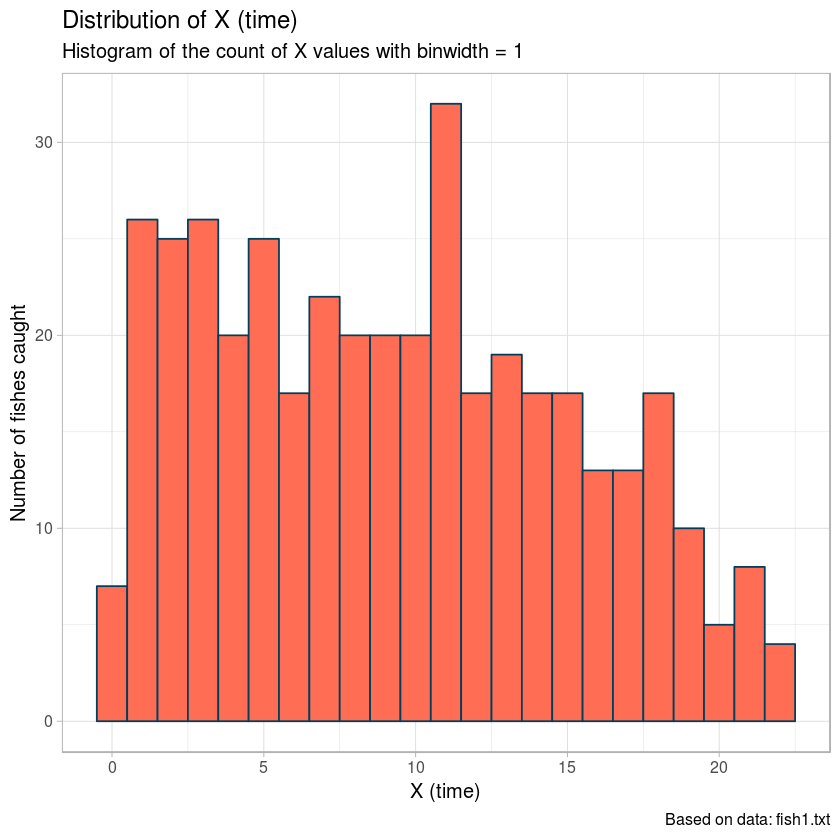

In [7]:
# histogram with binwidth = 1

ggplot(data = fish_data, mapping = aes(x = fish_data$X)) +
    geom_histogram(binwidth = 1, color = base_color2, fill = base_color1) +
    labs(title = "Distribution of X (time)", subtitle = "Histogram of the count of X values with binwidth = 1",
         x = "X (time)", y = "Number of fishes caught", caption = "Based on data: fish1.txt") +
    theme_light(base_size = 12)

Here we have considered a bin width of 1. Next we consider binwidth given by  Freedman-Diaconis rule



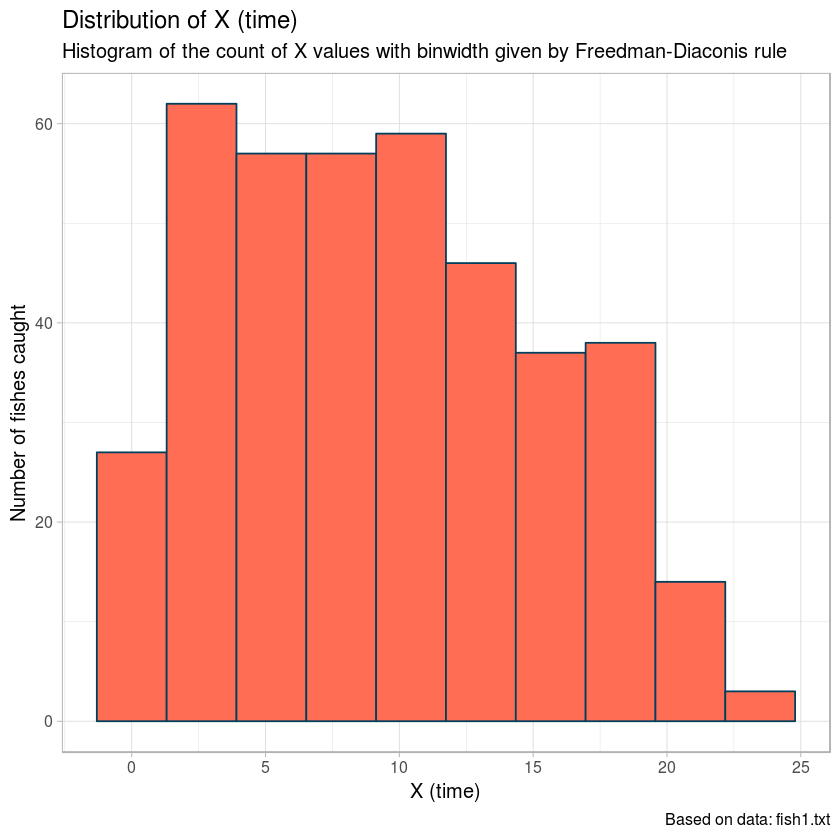

In [8]:
# histogram with binwidth = Freedman-Diaconis rule

ggplot(data = fish_data, mapping = aes(x = fish_data$X)) +
    geom_histogram(binwidth = binwidth_X, color = base_color2, fill = base_color1) +
    labs(title = "Distribution of X (time)", 
         subtitle = "Histogram of the count of X values with binwidth given by Freedman-Diaconis rule",
         x = "X (time)", y = "Number of fishes caught", caption = "Based on data: fish1.txt") +
    theme_light(base_size = 12)

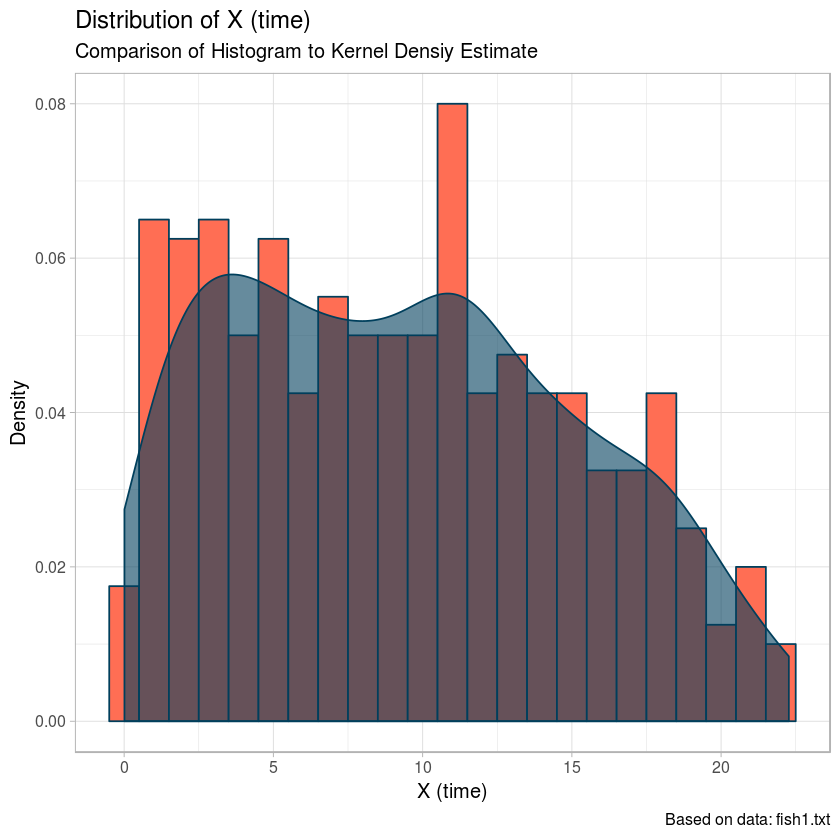

In [50]:
# Histogram overlaid with kernel density curve


ggplot(data = fish_data, mapping = aes(x = fish_data$X)) +
    geom_histogram(aes(y=..density..), binwidth = 1, color = base_color2, fill = base_color1) +
    geom_density(color = base_color2, fill = base_color2, alpha = 0.6) +
    labs(title = "Distribution of X (time)", 
         subtitle = "Comparison of Histogram to Kernel Densiy Estimate",
         x = "X (time)", y = "Density", caption = "Based on data: fish1.txt") +
    theme_light(base_size = 12)

### Summary Statistics of X


In [10]:
summary(fish_data$X)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.010   4.325   9.020   9.371  13.748  22.270 

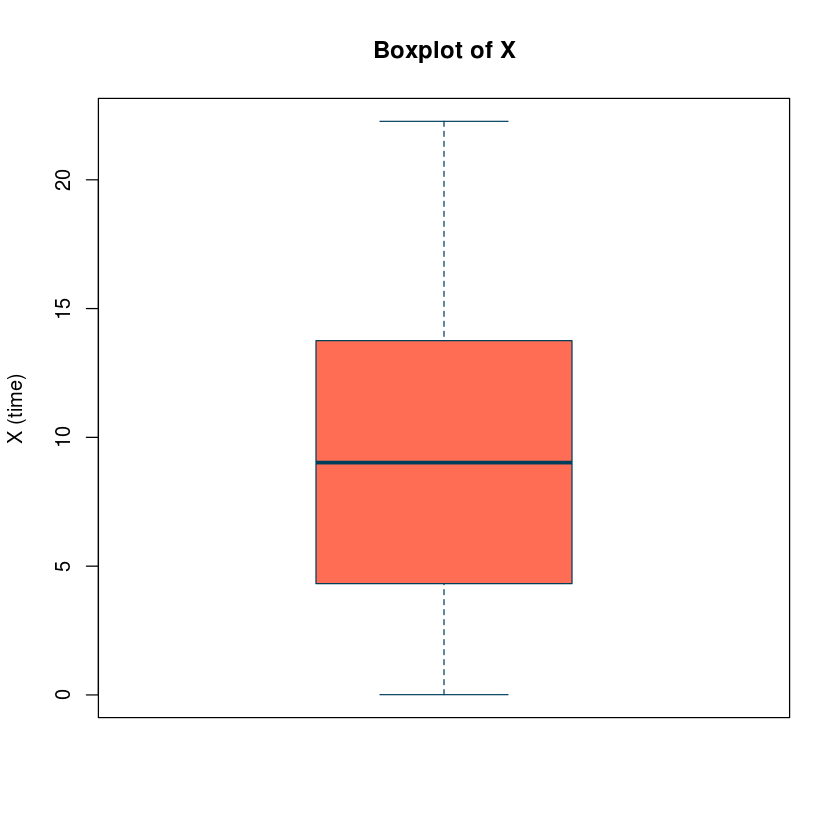

In [11]:
boxplot(fish_data$X, main = "Boxplot of X", ylab = "X (time)", 
        border = base_color2, col = base_color1)

From summary stats we can see that mean and median are quite close, and our data is more or less symmetric without many outliers

The data will be slightly skewed to the right (positive skew) as mean > median . Also we can see this from the density curve 

In [12]:
X_IQR <- summary(fish_data$X)['3rd Qu.'] - summary(fish_data$X)['1st Qu.']

X_IQR

3rd Qu. 
 9.4225 

In [13]:
X_sd <- sd(fish_data$X)

print(X_sd)

[1] 5.7964


In [14]:
X_skew <- (mean(fish_data$X) - median(fish_data$X))/X_sd
print(X_skew)

[1] 0.06047288


### Distribution of Y

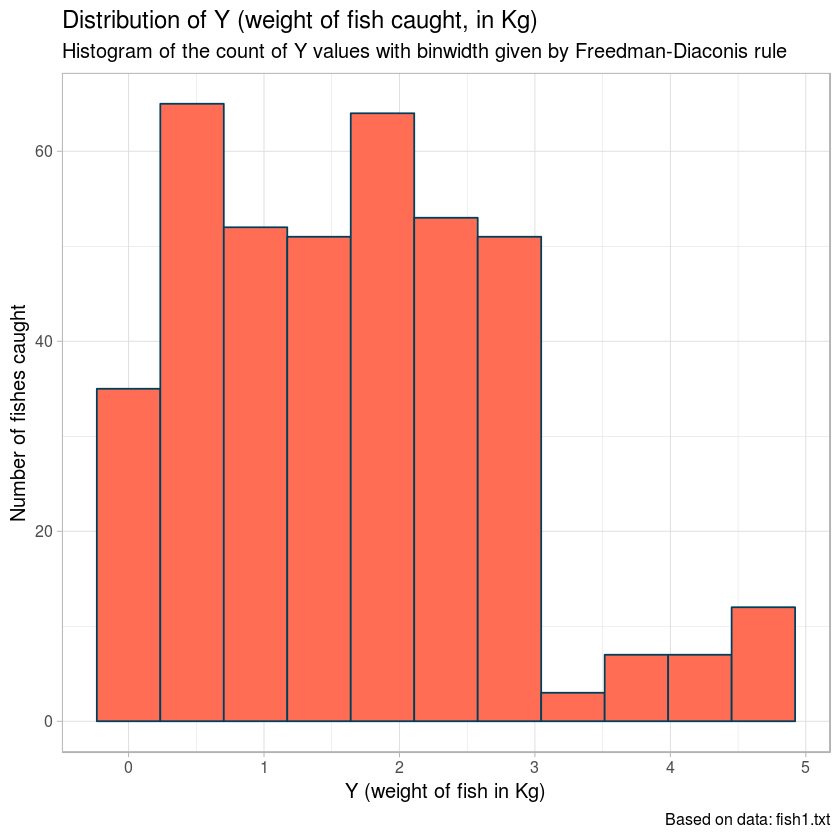

In [52]:
# histogram with binwidth by FD rule

ggplot(data = fish_data, mapping = aes(x = fish_data$Y)) +
    geom_histogram(binwidth = binwidth_Y, color = base_color2, fill = base_color1) +
    labs(title = "Distribution of Y (weight of fish caught, in Kg)", 
         subtitle = "Histogram of the count of Y values with binwidth given by Freedman-Diaconis rule",
         x = "Y (weight of fish in Kg)", y = "Number of fishes caught", caption = "Based on data: fish1.txt") +
    theme_light(base_size = 12)

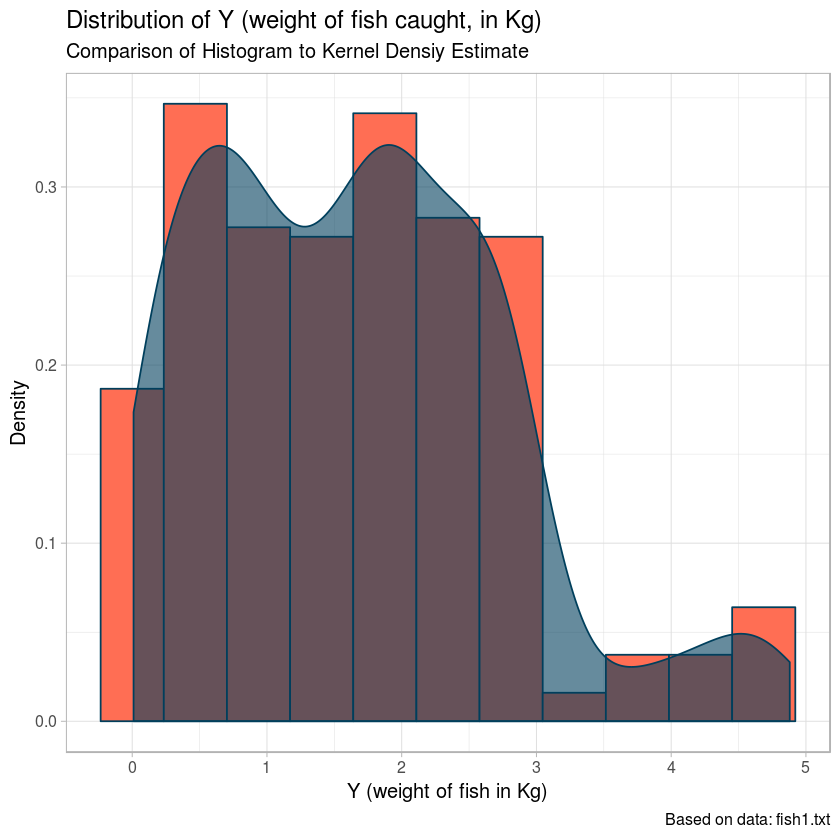

In [16]:
# Histogram overlaid with kernel density curve


ggplot(data = fish_data, mapping = aes(x = fish_data$Y)) +
    geom_histogram(aes(y=..density..), binwidth = binwidth_Y, color = base_color2, fill = base_color1) +
    geom_density(color = base_color2, fill = base_color2, alpha = 0.6) +
    labs(title = "Distribution of Y (weight of fish caught, in Kg)", 
         subtitle = "Comparison of Histogram to Kernel Densiy Estimate",
         x = "Y (weight of fish in Kg)", y = "Density", caption = "Based on data: fish1.txt") +
    theme_light(base_size = 12)

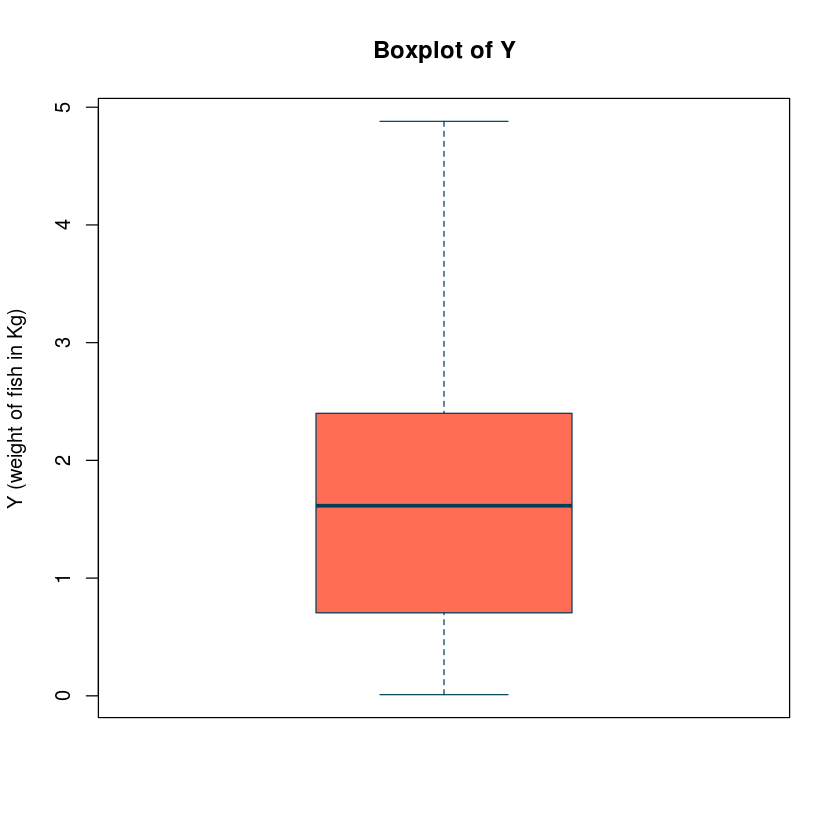

In [17]:
boxplot(fish_data$Y, main = "Boxplot of Y", ylab = "Y (weight of fish in Kg)", 
        border = base_color2, col = base_color1)

### Summary Statistics of Y



In [18]:
summary(fish_data$Y)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0100  0.7075  1.6150  1.6674  2.4000  4.8800 

From summary stats we can see that mean is greater than the median , so our data has a positive skew (skewed to the right). Also there might be a few high values as is seen from the distribution plots. These pull the mean away from the median. However, there are no extreme outliers as shown in the boxplot


In [19]:
Y_IQR <- summary(fish_data$Y)['3rd Qu.'] - summary(fish_data$Y)['1st Qu.']

Y_IQR

3rd Qu. 
 1.6925 

In [20]:
Y_sd <- sd(fish_data$Y)

print(Y_sd)

[1] 1.10816


In [21]:
Y_skew <- (mean(fish_data$Y) - median(fish_data$Y))/Y_sd
print(Y_skew)

[1] 0.04728561


### Analysing effectiveness of each type of bait

In [22]:
head(fish_data)

X,Y,Z
15.25,2.40,B
7.43,1.66,C
7.17,2.75,C
2.93,1.21,A
11.07,0.39,C
4.29,1.84,A


- We want to find the number of fishes that have been caught by each type of bait

- Ave mass of fishes caught by each type of bait

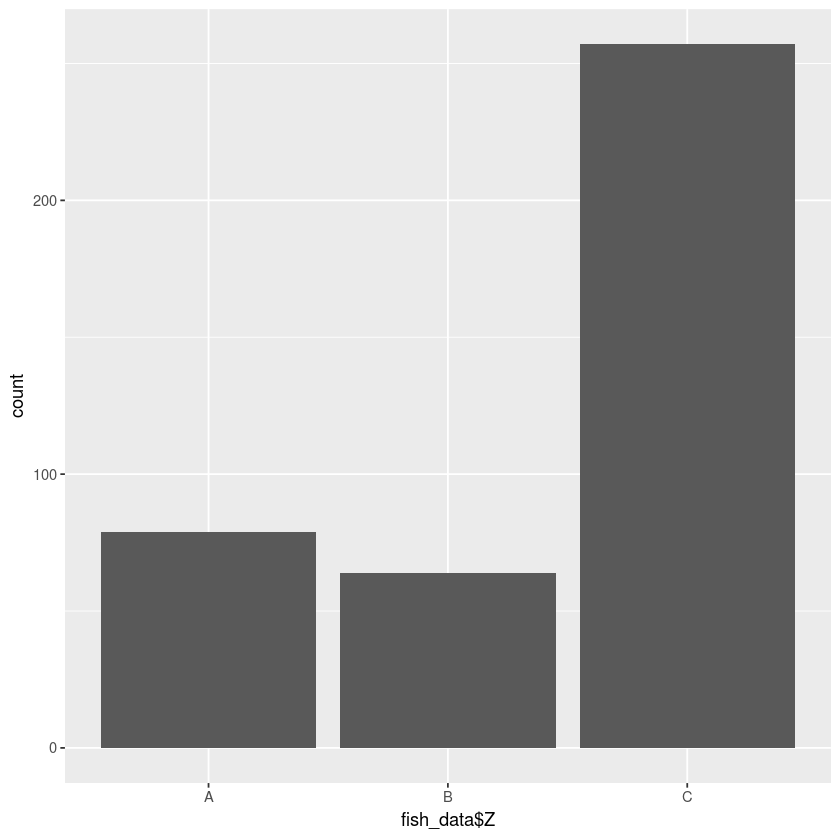

In [23]:
ggplot(data = fish_data) +
    geom_bar(mapping = aes(x = fish_data$Z))

In [24]:
by_bait <- group_by(fish_data, Z)



fish_data_by_bait <- summarise(by_bait, count_fish = n(), ave_mass = mean(Y, na.rm = TRUE), 
                               median_mass = median(Y, na.rm = TRUE), count_times_median = count_fish*median_mass)

fish_data_by_bait

Z,count_fish,ave_mass,median_mass,count_times_median
A,79,1.528987,1.34,105.86
B,64,1.783750,1.79,114.56
C,257,1.680973,1.66,426.62


In [25]:
# check if group_by and summarise worked correctly

sum(as.vector(fish_data[fish_data["Z"] == "C",]["Y"]))/ count(as.vector(fish_data[fish_data["Z"] == "C",]["Y"]))

n
1.680973


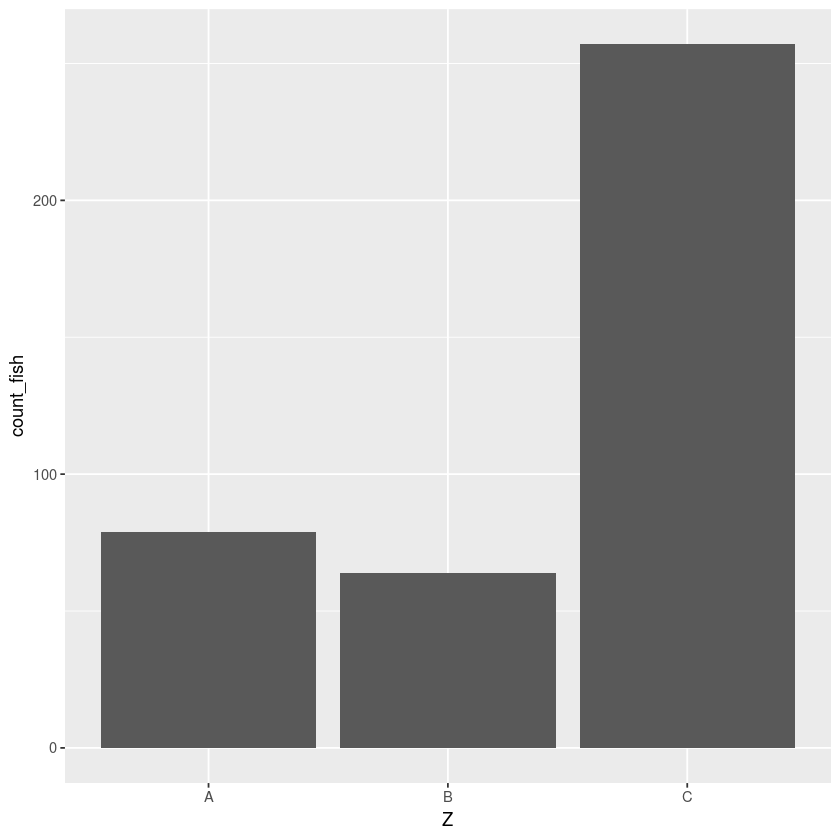

In [26]:
ggplot(data = fish_data_by_bait) +
    geom_bar(mapping = aes(x = Z, y = count_fish), stat = "identity")

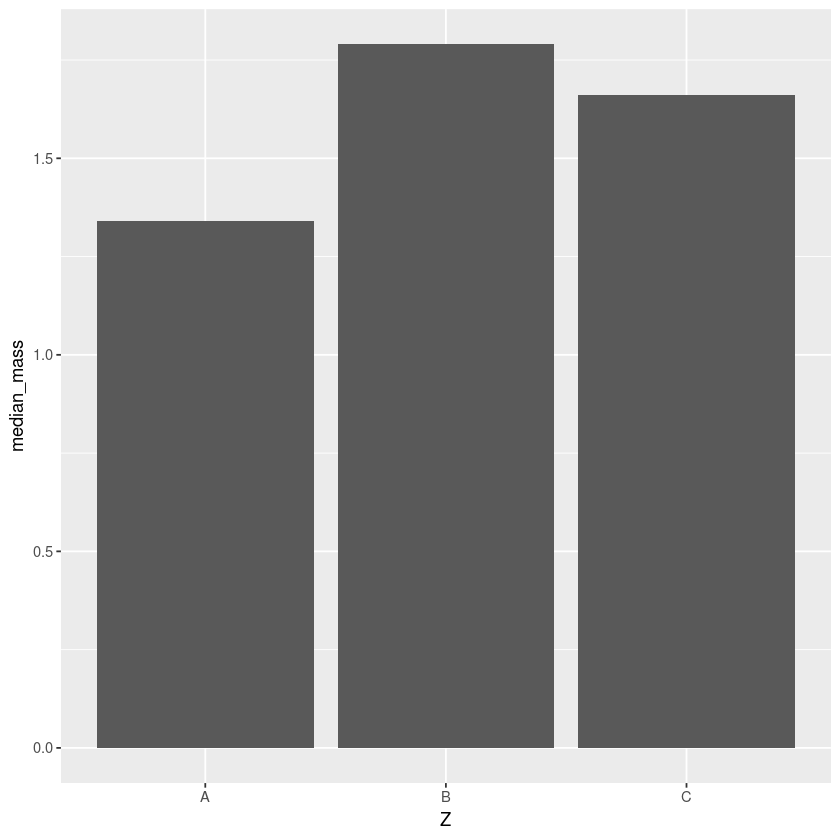

In [27]:
ggplot(data = fish_data_by_bait) +
    geom_bar(mapping = aes(x = Z, y = median_mass), stat = "identity")

**Even though bait type C caught many more fishes as a whole, bait type B generally caught heavier fishes**

### mean values with 95% confidence intervals for both distributions

In [28]:
z_score <- qnorm(p = 0.975)

z_score
mean(fish_data$X)

sd(fish_data$X)

nrow(fish_data)


mean_low <- mean(fish_data$Y) - (z_score * sd(fish_data$Y))/sqrt(nrow(fish_data))

print(mean_low)

mean_high <- mean(fish_data$Y) + (z_score * sd(fish_data$Y))/sqrt(nrow(fish_data))


print(mean_high)

[1] 1.959964

[1] 9.370525

[1] 5.7964

[1] 400

[1] 1.558802
[1] 1.775998


In [29]:
?boxplot

## Second Part

### Relationship bw X and Y

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


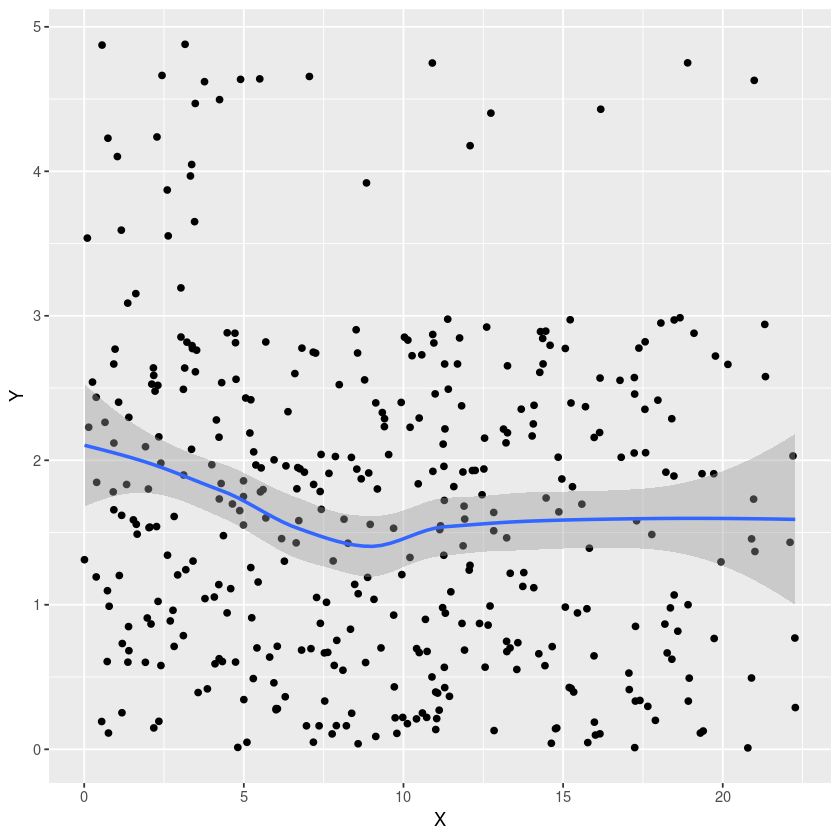

In [30]:
ggplot(data = fish_data) +
    geom_point(mapping = aes(x = X, y = Y), position = "jitter") +
    geom_smooth(mapping = aes(x = X, y = Y), se = TRUE)

There appears to be no significant relationship between X and Y

From the plot it appears as if there would be weak 

### Correlation bw X and Y

In [31]:
X_Y_df <- data.frame(fish_data$X, fish_data$Y)

head(X_Y_df)

cor(X_Y_df)

cov(fish_data$X, fish_data$Y)

fish_data.X,fish_data.Y
15.25,2.40
7.43,1.66
7.17,2.75
2.93,1.21
11.07,0.39
4.29,1.84


,fish_data.X,fish_data.Y
fish_data.X,1.000000,-0.120593
fish_data.Y,-0.120593,1.000000


[1] -0.7746094

In [32]:
cor.test(fish_data$X, fish_data$Y, method = "pearson")


	Pearson's product-moment correlation

data:  fish_data$X and fish_data$Y
t = -2.4235, df = 398, p-value = 0.01582
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.21608959 -0.02281099
sample estimates:
      cor 
-0.120593 


In [33]:
cor.test(fish_data$X, fish_data$Y, method = "kendall")


	Kendall's rank correlation tau

data:  fish_data$X and fish_data$Y
z = -2.1463, p-value = 0.03185
alternative hypothesis: true tau is not equal to 0
sample estimates:
        tau 
-0.07198278 


In [34]:
cor.test(fish_data$X, fish_data$Y, method = "spearman")

Warning message in cor.test.default(fish_data$X, fish_data$Y, method = "spearman"):
“Cannot compute exact p-value with ties”


	Spearman's rank correlation rho

data:  fish_data$X and fish_data$Y
S = 11817000, p-value = 0.03106
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.1078352 


This is confirmed by the correlation matrix. There is indeed weak relationship between X and Y

In [35]:
shapiro.test(fish_data$X)

shapiro.test(fish_data$Y)


	Shapiro-Wilk normality test

data:  fish_data$X
W = 0.9628, p-value = 1.553e-08



	Shapiro-Wilk normality test

data:  fish_data$Y
W = 0.94993, p-value = 2.156e-10


### Analysing the amount of information about Y that is given by knowledge of X

Fitting a linear model:

In [36]:
lm1 <- lm(fish_data$Y ~ fish_data$X)

summary(lm1)


Call:
lm(formula = fish_data$Y ~ fish_data$X)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.7625 -0.9286 -0.0540  0.7033  3.3023 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.883438   0.104783  17.975   <2e-16 ***
fish_data$X -0.023055   0.009513  -2.424   0.0158 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.101 on 398 degrees of freedom
Multiple R-squared:  0.01454,	Adjusted R-squared:  0.01207 
F-statistic: 5.873 on 1 and 398 DF,  p-value: 0.01582


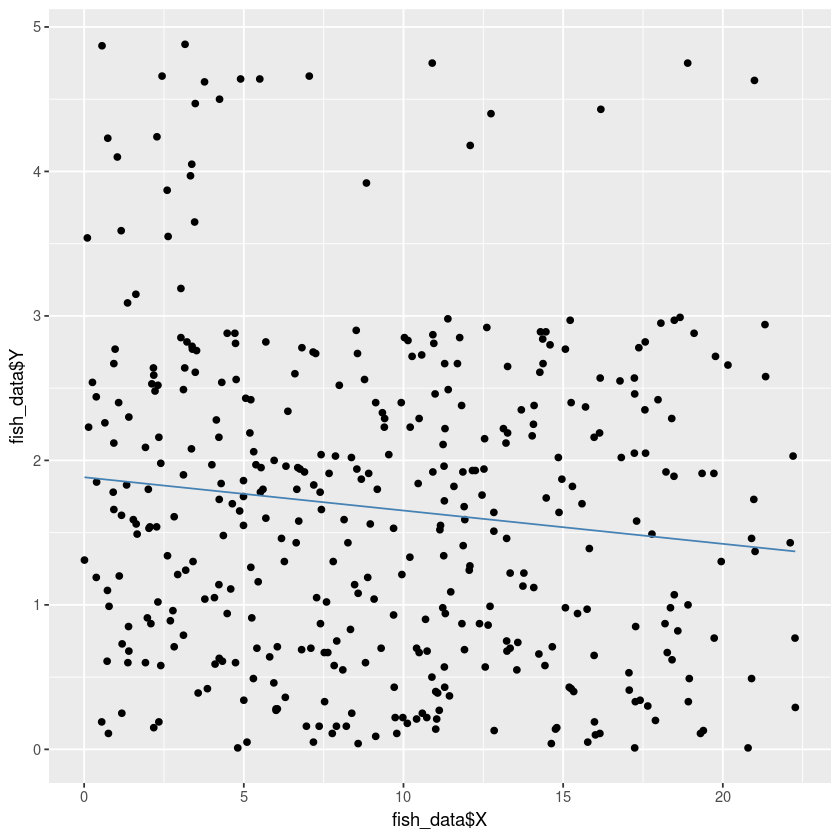

In [37]:
ggplot(data = fish_data) +
    geom_point(mapping = aes(x = fish_data$X, y = fish_data$Y)) +
    geom_line(mapping = aes(x = fish_data$X, y = predict(lm1)), color = "steelblue")

Here the Adjusted R-squared:  0.01207 implies that only 1.2% of the variation in Y is explained by X, which is quite low as there exists no significant relationship between the 2 vars

Also the p-value for X and F-statistic is 0.0158 also underline the fact that there is no relationship

Fitting a polynomial model of degree = 2:

In [38]:
lm2 <- lm ( fish_data$Y ~ poly (fish_data$X, 2)) 

summary(lm2)


Call:
lm(formula = fish_data$Y ~ poly(fish_data$X, 2))

Residuals:
    Min      1Q  Median      3Q     Max 
-1.9537 -0.9222 -0.0436  0.7270  3.2409 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)             1.6674     0.0548  30.426   <2e-16 ***
poly(fish_data$X, 2)1  -2.6694     1.0960  -2.435   0.0153 *  
poly(fish_data$X, 2)2   2.4354     1.0960   2.222   0.0268 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.096 on 397 degrees of freedom
Multiple R-squared:  0.02665,	Adjusted R-squared:  0.02174 
F-statistic: 5.434 on 2 and 397 DF,  p-value: 0.004695


Even with polynomial the Adjusted R-squared:  0.02174  implies that only 2.1% of the variation in Y is explained by X, which is quite low as there exists no significant relationship between the 2 vars


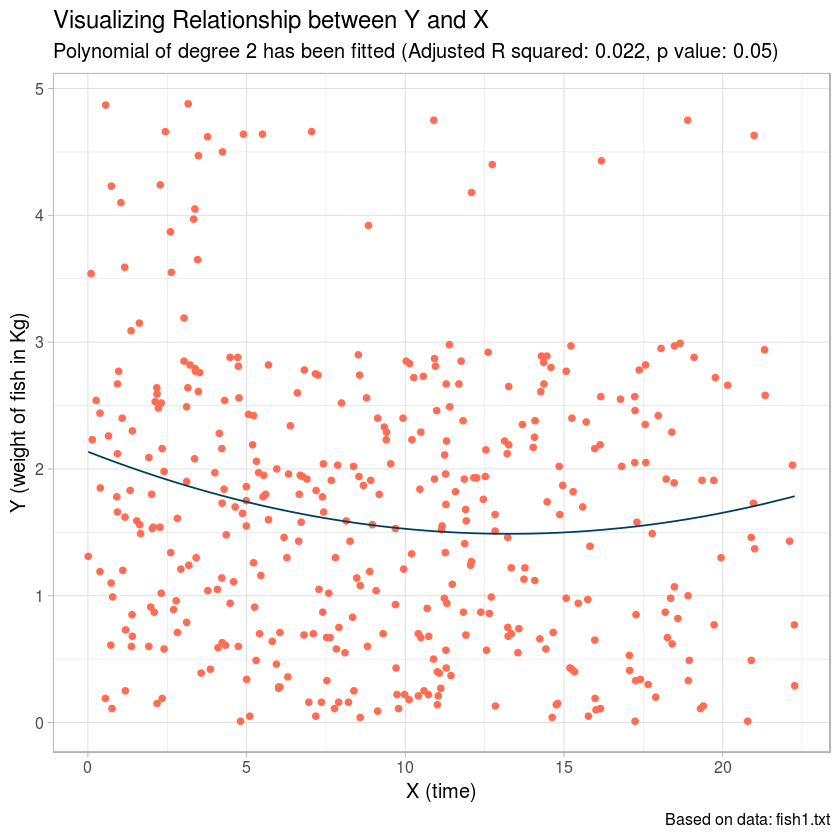

In [39]:
ggplot(data = fish_data) +
    geom_point(mapping = aes(x = fish_data$X, y = fish_data$Y), color = base_color1) +
    geom_line(mapping = aes(x = fish_data$X, y = predict(lm2)), color = base_color2) +
    labs(title = "Visualizing Relationship between Y and X", 
         subtitle = "Polynomial of degree 2 has been fitted (Adjusted R squared: 0.022, p value: 0.05)",
         x = "X (time)", y = "Y (weight of fish in Kg)", caption = "Based on data: fish1.txt") +
    theme_light(base_size = 12)

In [40]:
lm20 <- lm ( fish_data$Y ~ poly (fish_data$X, 20)) 

summary(lm20)


Call:
lm(formula = fish_data$Y ~ poly(fish_data$X, 20))

Residuals:
    Min      1Q  Median      3Q     Max 
-2.0019 -0.8912 -0.0412  0.6818  3.2574 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)              1.66740    0.05483  30.410   <2e-16 ***
poly(fish_data$X, 20)1  -2.66938    1.09663  -2.434   0.0154 *  
poly(fish_data$X, 20)2   2.43540    1.09663   2.221   0.0270 *  
poly(fish_data$X, 20)3  -0.61667    1.09663  -0.562   0.5742    
poly(fish_data$X, 20)4  -1.05062    1.09663  -0.958   0.3387    
poly(fish_data$X, 20)5   1.31982    1.09663   1.204   0.2295    
poly(fish_data$X, 20)6  -0.99872    1.09663  -0.911   0.3630    
poly(fish_data$X, 20)7  -2.39342    1.09663  -2.183   0.0297 *  
poly(fish_data$X, 20)8   1.14970    1.09663   1.048   0.2951    
poly(fish_data$X, 20)9  -1.21798    1.09663  -1.111   0.2674    
poly(fish_data$X, 20)10 -0.53550    1.09663  -0.488   0.6256    
poly(fish_data$X, 20)11 -0.23685    1.09663  -0.216   

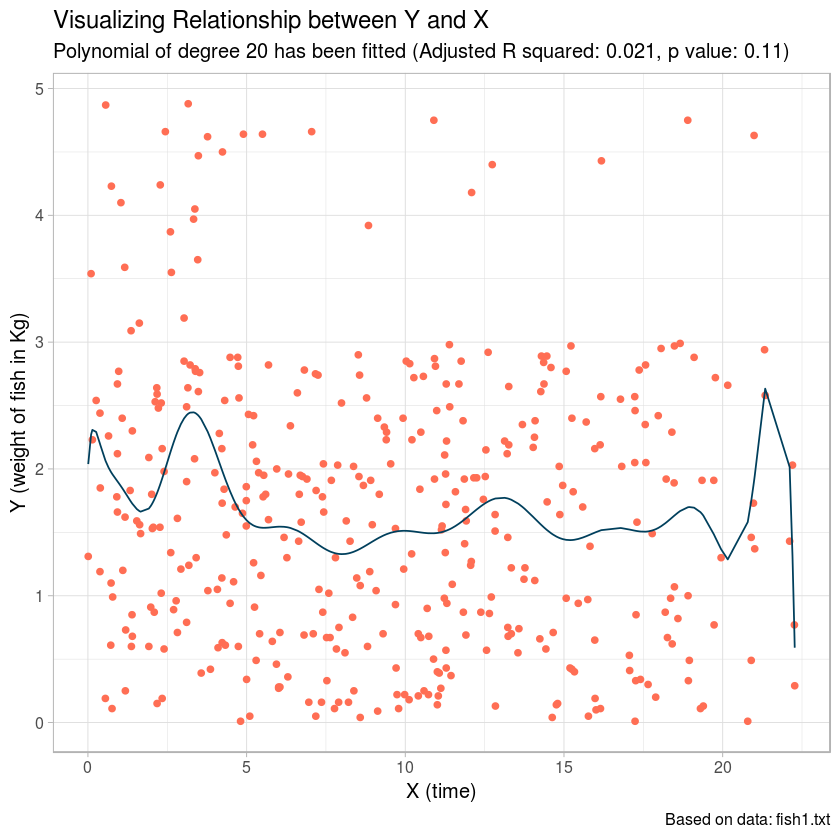

In [41]:
ggplot(data = fish_data) +
    geom_point(mapping = aes(x = fish_data$X, y = fish_data$Y), color = base_color1) +
    geom_line(mapping = aes(x = fish_data$X, y = predict(lm20)), color = base_color2) +
    labs(title = "Visualizing Relationship between Y and X", 
         subtitle = "Polynomial of degree 20 has been fitted (Adjusted R squared: 0.021, p value: 0.11)",
         x = "X (time)", y = "Y (weight of fish in Kg)", caption = "Based on data: fish1.txt") +
    theme_light(base_size = 12)

It can be clearly seen from the plot that even a 20 order polynomial does a poor job in explaining the variation of Y with X

### What is the best time to go fishing at this lake?

Consider binning X values

In [42]:
fish_data_X_binned <- mutate(fish_data, X_binned = paste(as.integer(X), "-", as.integer(X)+1, sep = ""))

head(fish_data)

head(fish_data_X_binned)

X,Y,Z
15.25,2.40,B
7.43,1.66,C
7.17,2.75,C
2.93,1.21,A
11.07,0.39,C
4.29,1.84,A


X,Y,Z,X_binned
15.25,2.40,B,15-16
7.43,1.66,C,7-8
7.17,2.75,C,7-8
2.93,1.21,A,2-3
11.07,0.39,C,11-12
4.29,1.84,A,4-5


In [43]:
by_time <- group_by(fish_data_X_binned, X_binned)

head(by_time)

fish_data_by_X <- summarise(by_time, count_fish = n(), mean_mass = mean(Y, na.rm = TRUE), 
                               median_mass = median(Y, na.rm = TRUE))

head(arrange(fish_data_by_X, desc(median_mass)))

head(arrange(fish_data_by_X, desc(mean_mass)))

head(arrange(fish_data_by_X, desc(count_fish)))

fish_data_by_X_count_mass <- mutate(fish_data_by_X, count_times_mass = median_mass*count_fish)

head(arrange(fish_data_by_X_count_mass, desc(count_times_mass)))


X,Y,Z,X_binned
15.25,2.40,B,15-16
7.43,1.66,C,7-8
7.17,2.75,C,7-8
2.93,1.21,A,2-3
11.07,0.39,C,11-12
4.29,1.84,A,4-5


X_binned,count_fish,mean_mass,median_mass
3-4,23,2.596522,2.760
21-22,3,2.296667,2.580
16-17,7,1.995714,2.190
0-1,20,2.023000,1.985
14-15,20,1.708500,1.945
10-11,22,1.724545,1.880


X_binned,count_fish,mean_mass,median_mass
3-4,23,2.596522,2.760
21-22,3,2.296667,2.580
0-1,20,2.023000,1.985
16-17,7,1.995714,2.190
2-3,26,1.890769,1.575
4-5,27,1.831852,1.730


X_binned,count_fish,mean_mass,median_mass
11-12,31,1.426774,1.520
4-5,27,1.831852,1.730
2-3,26,1.890769,1.575
7-8,24,1.347500,1.035
3-4,23,2.596522,2.760
10-11,22,1.724545,1.880


X_binned,count_fish,mean_mass,median_mass,count_times_mass
3-4,23,2.596522,2.760,63.48
11-12,31,1.426774,1.520,47.12
4-5,27,1.831852,1.730,46.71
10-11,22,1.724545,1.880,41.36
2-3,26,1.890769,1.575,40.95
0-1,20,2.023000,1.985,39.70


#### Add in an extra var: count * mass

**11am to 12pm** is best time to go fishing at this lake (count)

**3 to 4 am** is best time to go fishing at this lake (mass)

Median and mean mass is quite same, so the high value is just not because of presence of few outliers

We now build a new metric (count_fish * median_mass)

By that metric we take both count of fish and the mass into account

The best time to go fishing is indeed at **3-4am**


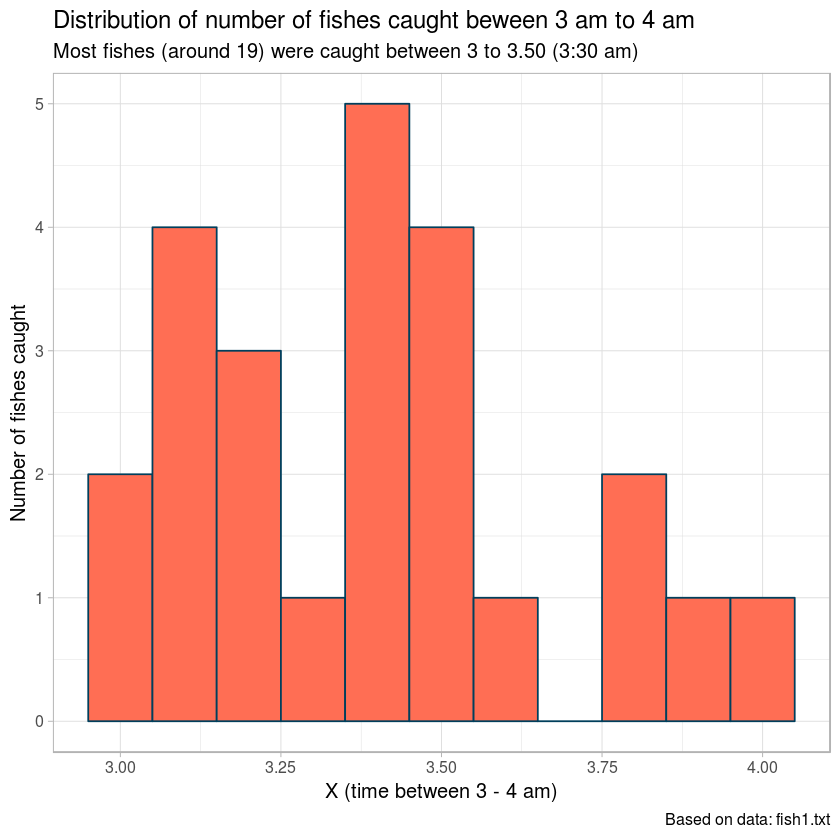

In [44]:
temp_df <- fish_data[fish_data["X"] >= 3 & fish_data["X"] <= 4, ]

ggplot(data = temp_df) +
    geom_histogram(mapping = aes(x = X), binwidth = 0.1, color = base_color2, fill = base_color1) + 
    labs(title = "Distribution of number of fishes caught beween 3 am to 4 am", 
         subtitle = "Most fishes (around 19) were caught between 3 to 3.50 (3:30 am)",
         x = "X (time between 3 - 4 am)", y = "Number of fishes caught", caption = "Based on data: fish1.txt") +
    theme_light(base_size = 12)

Drilling down further we can see that lots of fishes were (around 20) were caught between 3am to 3.30am

### Relationship bw X and Y and Z

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


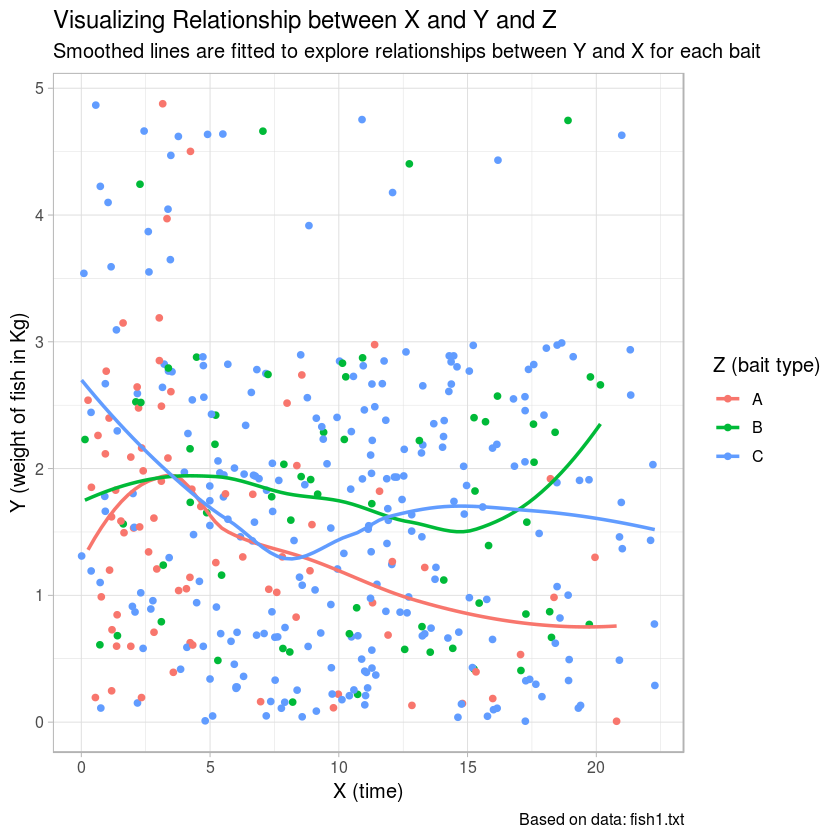

In [45]:
ggplot(data = fish_data) +
    geom_point(mapping = aes(x = X, y = Y, color = Z), position = "jitter") +
    geom_smooth(mapping = aes(x = X, y = Y, color = Z), se = FALSE) +
    labs(title = "Visualizing Relationship between X and Y and Z", 
         subtitle = "Smoothed lines are fitted to explore relationships between Y and X for each bait",
         x = "X (time)", y = "Y (weight of fish in Kg)", caption = "Based on data: fish1.txt", 
         colour = "Z (bait type)") +
    theme_light(base_size = 12)

### What is the best type of bait to use at 3pm in the afternoon? 

[1] 14.5
[1] 15.5


X,Y,Z
15.25,2.40,B
15.07,2.77,C
15.07,0.98,C
14.80,0.15,A
15.45,0.94,B
15.29,1.82,B
14.59,2.80,C
14.96,1.87,C
14.85,2.02,C
15.25,0.42,B


[1] 17


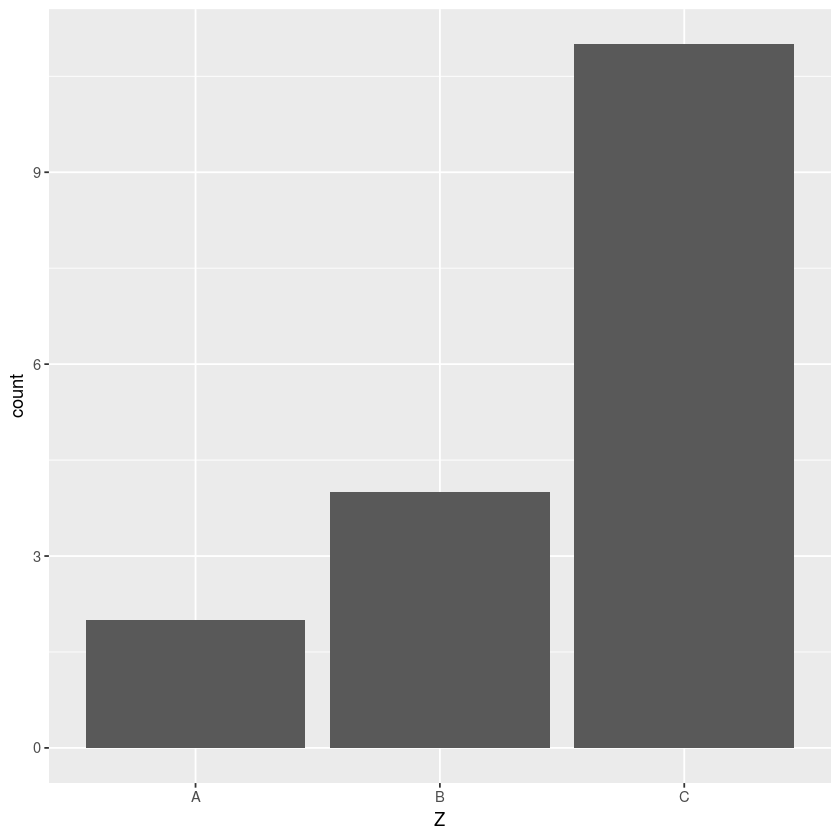

In [49]:
time <- 15

offset <- 0.5

max_time <- time + offset

min_time <- time - offset

print(min_time)

print(max_time)

fish_data_filtered_by_time <- dplyr::filter(fish_data, X > min_time & X < max_time)

fish_data_filtered_by_time

print(nrow(fish_data_filtered_by_time))



In [51]:
fish_data_filtered_by_time_by_Z <- group_by(fish_data_filtered_by_time, Z)

head(fish_data_filtered_by_time_by_Z)

fish_data_filtered_by_time_by_Z_final <- summarise(fish_data_filtered_by_time_by_Z, 
                                                   count_fish = n(), ave_mass = mean(Y, na.rm = TRUE), 
                                                   median_mass = median(Y, na.rm = TRUE), 
                                                   count_times_mass = count_fish * median_mass)

head(fish_data_filtered_by_time_by_Z_final)

X,Y,Z
15.25,2.40,B
15.07,2.77,C
15.07,0.98,C
14.80,0.15,A
15.45,0.94,B
15.29,1.82,B


Z,count_fish,ave_mass,median_mass,count_times_mass
A,2,0.275000,0.275,0.55
B,4,1.395000,1.380,5.52
C,11,1.488182,1.640,18.04


- **Visualize all 3 in a facet**

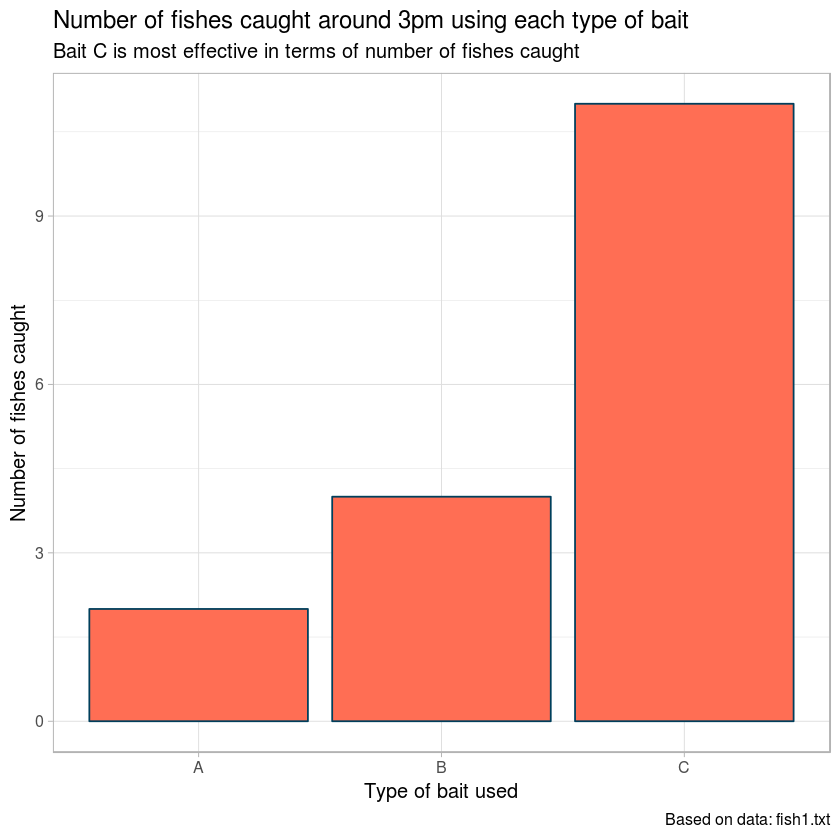

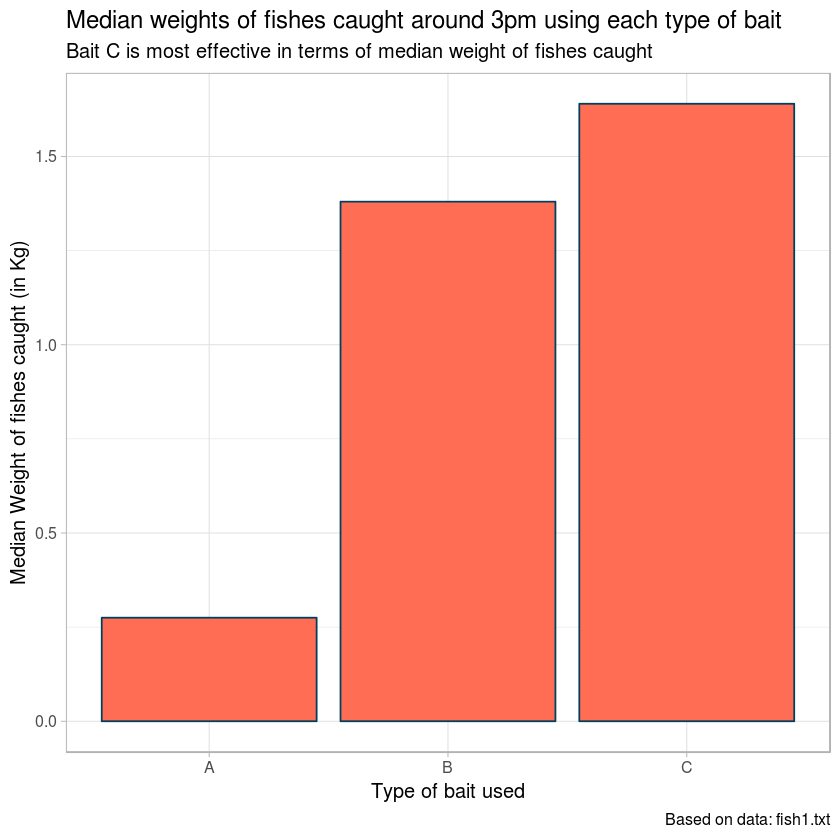

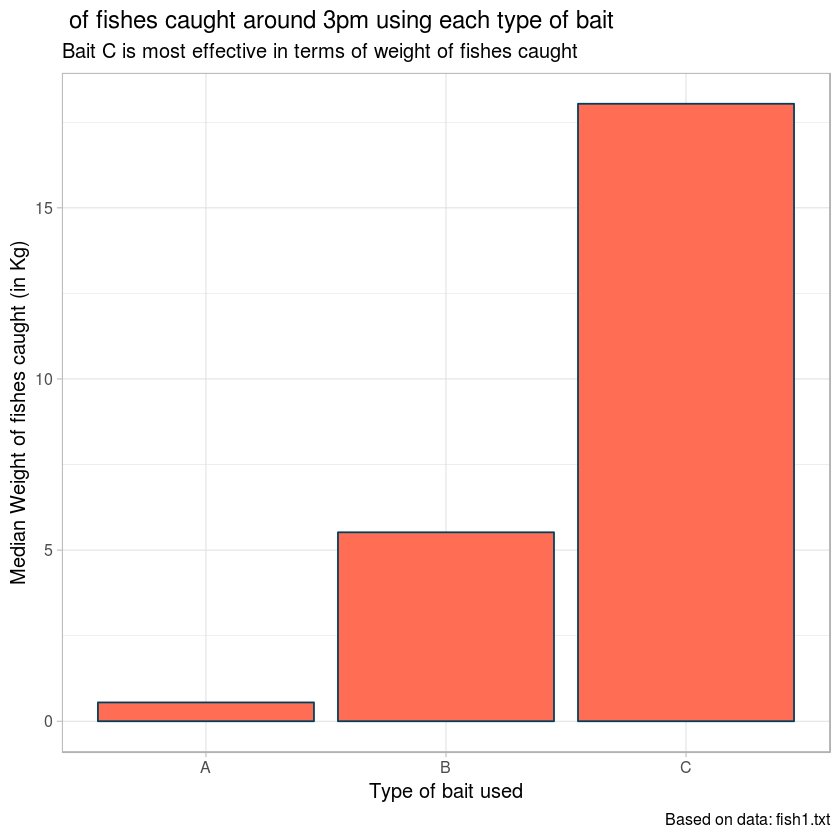

In [48]:
g1 <- ggplot(data = fish_data_filtered_by_time_by_Z_final) +
    geom_bar(mapping = aes(x = Z, y = count_fish), stat = "identity", fill = base_color1, color = base_color2) + 
    labs(title = "Number of fishes caught around 3pm using each type of bait", 
         subtitle = "Bait C is most effective in terms of number of fishes caught",
         x = "Type of bait used", y = "Number of fishes caught", caption = "Based on data: fish1.txt") +
    theme_light(base_size = 12)

plot(g1)

g2 <- ggplot(data = fish_data_filtered_by_time_by_Z_final) +
    geom_bar(mapping = aes(x = Z, y = ave_mass), stat = "identity", fill = base_color1, color = base_color2)



g3 <- ggplot(data = fish_data_filtered_by_time_by_Z_final) +
    geom_bar(mapping = aes(x = Z, y = median_mass), stat = "identity", fill = base_color1, color = base_color2) +
    labs(title = "Median weights of fishes caught around 3pm using each type of bait", 
         subtitle = "Bait C is most effective in terms of median weight of fishes caught",
         x = "Type of bait used", y = "Median Weight of fishes caught (in Kg)", caption = "Based on data: fish1.txt") +
    theme_light(base_size = 12)

plot(g3)


g4 <- ggplot(data = fish_data_filtered_by_time_by_Z_final) +
    geom_bar(mapping = aes(x = Z, y = count_times_mass), stat = "identity", fill = base_color1, color = base_color2) +
    labs(title = " of fishes caught around 3pm using each type of bait", 
         subtitle = "Bait C is most effective in terms of weight of fishes caught",
         x = "Type of bait used", y = "Median Weight of fishes caught (in Kg)", caption = "Based on data: fish1.txt") +
    theme_light(base_size = 12)

plot(g4)

